# Distribution

In [35]:
import matplotlib.pyplot as plt
import numpy as np

In [43]:
dxs = [0.01, 0.05, 0.10, 0.50, 1.00]
densities = [0.05, 0.30, 0.50]

In [19]:
# Open the file
with open('./data/configs/sigma=1.00.xyz', 'r') as file:
    lines = file.readlines()

# Parse the values
parameters = {}
results = {}
parameters["N"] = int(lines[0].split('=')[1].strip())
parameters["N_steps"] = int(lines[1].split('=')[1].strip())
parameters["box_x"] = float(lines[2].split('=')[1].strip())
parameters["box_y"] = float(lines[3].split('=')[1].strip())
parameters["box_z"] = float(lines[4].split('=')[1].strip())
parameters["temperature"] = float(lines[5].split('=')[1].strip())
parameters["delta_x"] = float(lines[6].split('=')[1].strip())
parameters["myseed"] = int(lines[7].split('=')[1].strip())
parameters["sigma"] = float(lines[8].split('=')[1].strip())
parameters["model"] = int(lines[9].split('=')[1].strip())
results["tries"] = int(lines[10].split('=')[1].strip())
results["accepted"] = int(lines[11].split('=')[1].strip())
results["overlap"] = int(lines[12].split('=')[1].strip())
parameters["density"] = float(lines[13].split('=')[1].strip())
results["E"] = float(lines[14].split('=')[1].strip())


# Parse the positions
positions = []
for line in lines[15:]:
    pos = list(map(float, line.split()[1:]))
    positions.append(pos)



Average distribution along axis 0: 47.6348
Average distribution along axis 1: 47.64630000000001
Average distribution along axis 2: 49.35999999999997


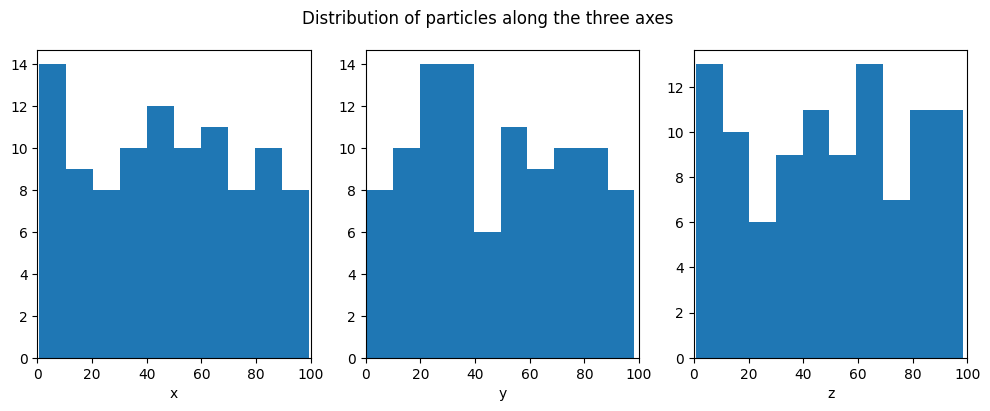

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    i_ax_vals = [pos[i] for pos in positions]
    axes[i].hist(i_ax_vals)#, bins=50, density=True)
    axes[i].set_xlim([0, parameters[f"box_{'xyz'[i]}"]])
    print(f"Average distribution along axis {i}: {sum(i_ax_vals)/len(i_ax_vals)}")
axes[0].set_xlabel('x')
axes[1].set_xlabel('y')
axes[2].set_xlabel('z')
fig.suptitle("Distribution of particles along the three axes")
plt.show()

In [39]:
def read_values(density, dx):
    parameters = {}
    results = {}
    all_positions = []
    for i in range(10):
        with open('./data/density={:.2f}/dx={:.2f}sigma/run{}.xyz'.format(density,dx,i), 'r') as file:
            lines = file.readlines()

        #Parameters are equal for each realization
        if i == 0:
            parameters["N"] = int(lines[0].split('=')[1].strip())
            parameters["N_steps"] = int(lines[1].split('=')[1].strip())
            parameters["box_x"] = float(lines[2].split('=')[1].strip())
            parameters["box_y"] = float(lines[3].split('=')[1].strip())
            parameters["box_z"] = float(lines[4].split('=')[1].strip())
            parameters["temperature"] = float(lines[5].split('=')[1].strip())
            parameters["delta_x"] = float(lines[6].split('=')[1].strip())
            parameters["myseed"] = int(lines[7].split('=')[1].strip())
            parameters["sigma"] = float(lines[8].split('=')[1].strip())
            parameters["model"] = int(lines[9].split('=')[1].strip())
            parameters["density"] = float(lines[13].split('=')[1].strip())
        
            results["tries"] = [int(lines[10].split('=')[1].strip())]
            results["accepted"] = [int(lines[11].split('=')[1].strip())]
            results["overlap"] = [int(lines[12].split('=')[1].strip())]
            results["E"] = [float(lines[14].split('=')[1].strip())]

        else:
            results["tries"].append(int(lines[10].split('=')[1].strip()))
            results["accepted"].append(int(lines[11].split('=')[1].strip()))
            results["overlap"].append(int(lines[12].split('=')[1].strip()))
            results["E"].append(float(lines[14].split('=')[1].strip()))
        # Parse the positions
        positions = []
        for line in lines[16:]:
            pos = list(map(float, line.split()[1:]))
            positions.append(pos)
        all_positions.append(positions)
    return parameters, results, all_positions


In [32]:
param, res, all_pos = read_values(0.05,0.01)

{'tries': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'accepted': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'overlap': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'E': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


Average distribution along axis 0: 5.272700000000001
Average distribution along axis 1: 4.961899999999999
Average distribution along axis 2: 10.180200000000003
Average distribution along axis 0: 4.932999999999999
Average distribution along axis 1: 5.0005
Average distribution along axis 2: 9.9918
Average distribution along axis 0: 5.3210000000000015
Average distribution along axis 1: 5.099799999999999
Average distribution along axis 2: 9.420099999999998
Average distribution along axis 0: 5.074399999999999
Average distribution along axis 1: 4.983500000000002
Average distribution along axis 2: 10.867299999999998
Average distribution along axis 0: 5.623699999999999
Average distribution along axis 1: 4.867299999999999
Average distribution along axis 2: 10.255199999999995
Average distribution along axis 0: 4.806800000000001
Average distribution along axis 1: 4.964800000000002
Average distribution along axis 2: 9.3025
Average distribution along axis 0: 5.375999999999998
Average distribution a

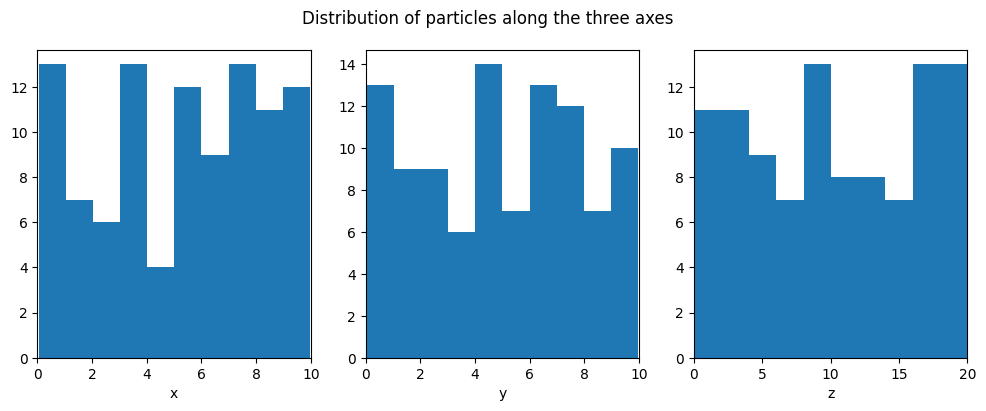

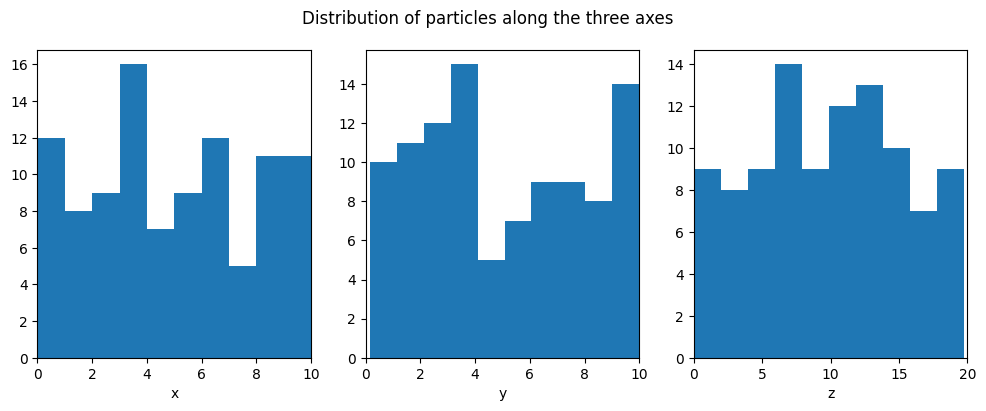

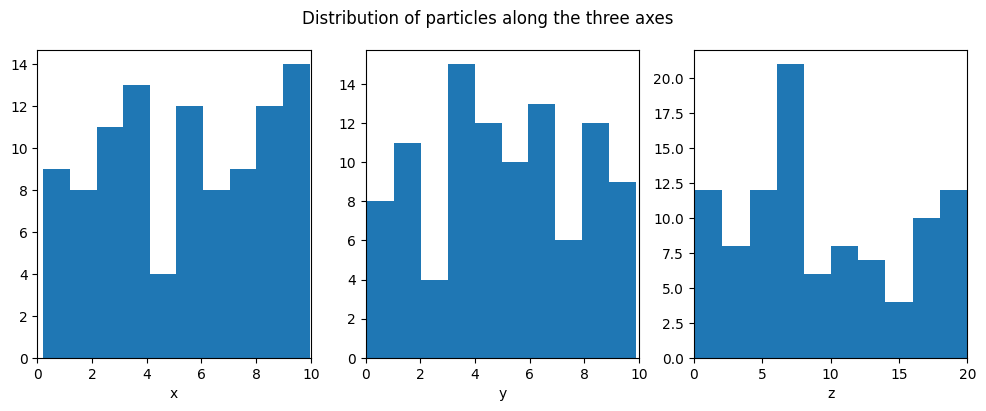

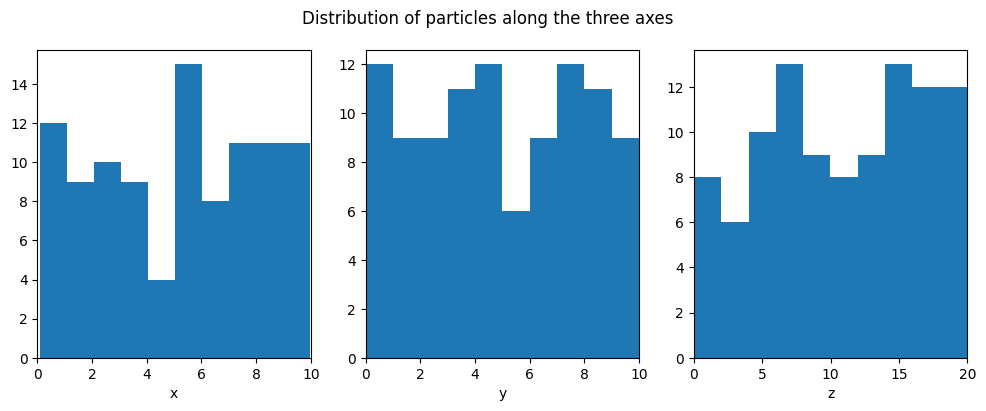

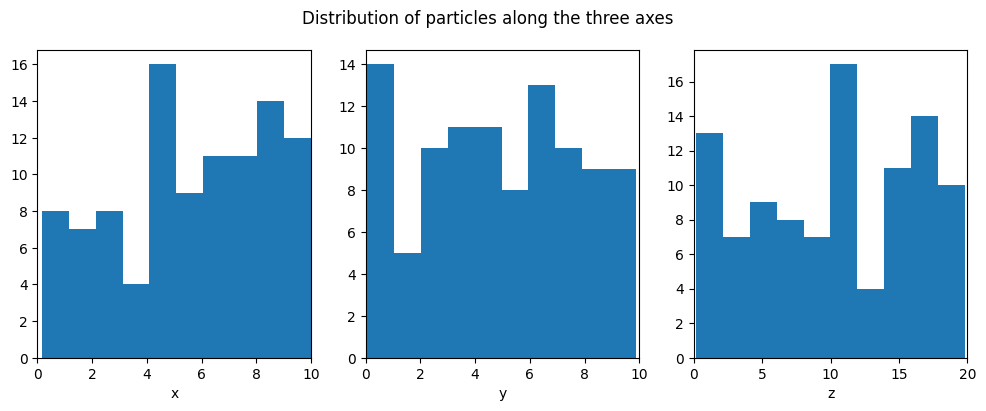

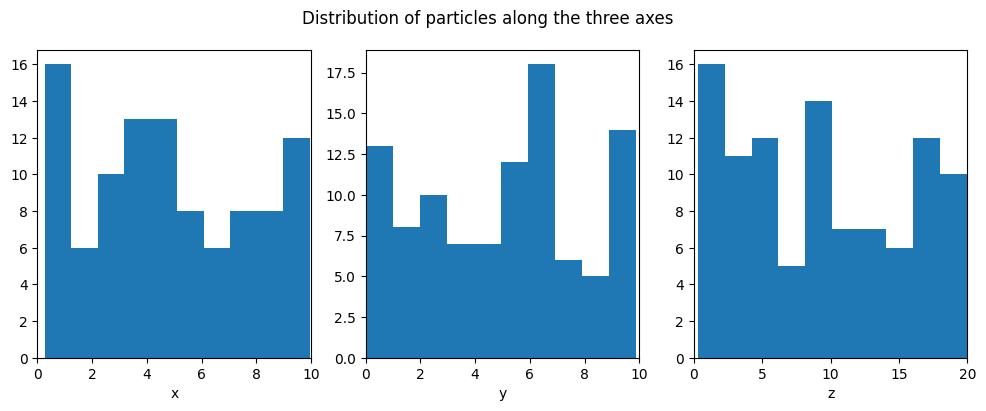

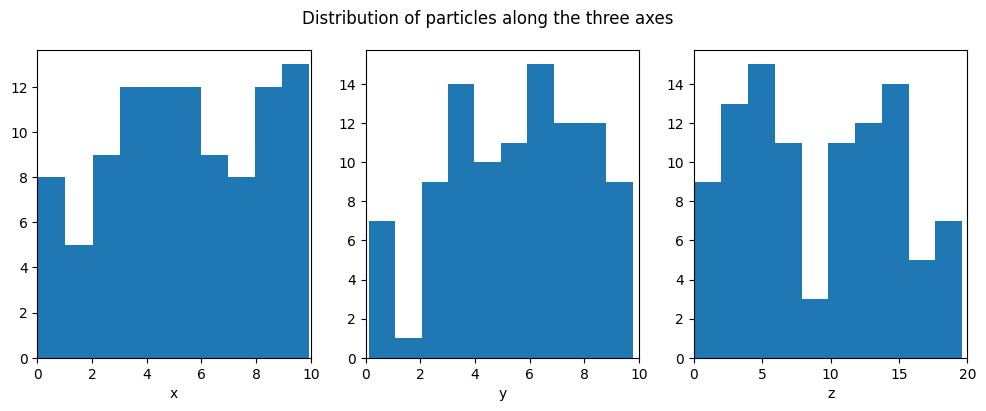

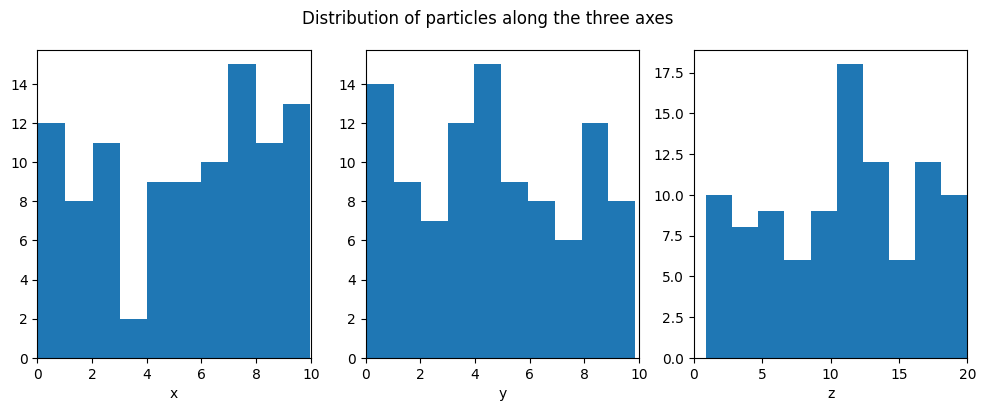

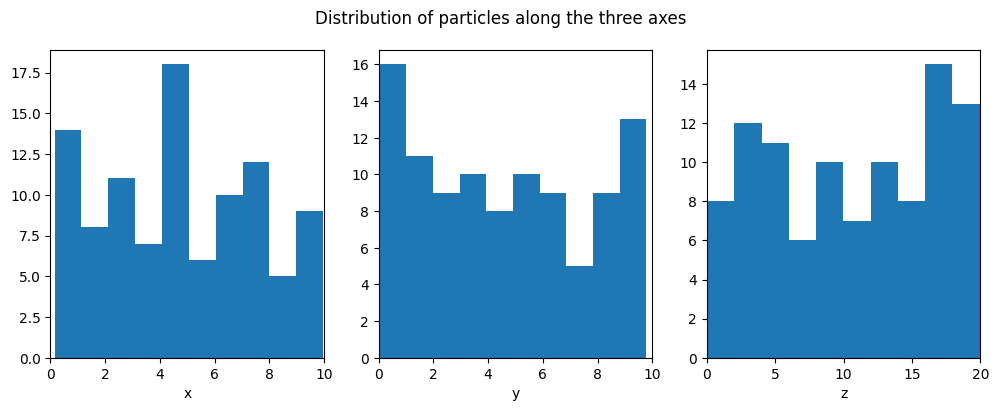

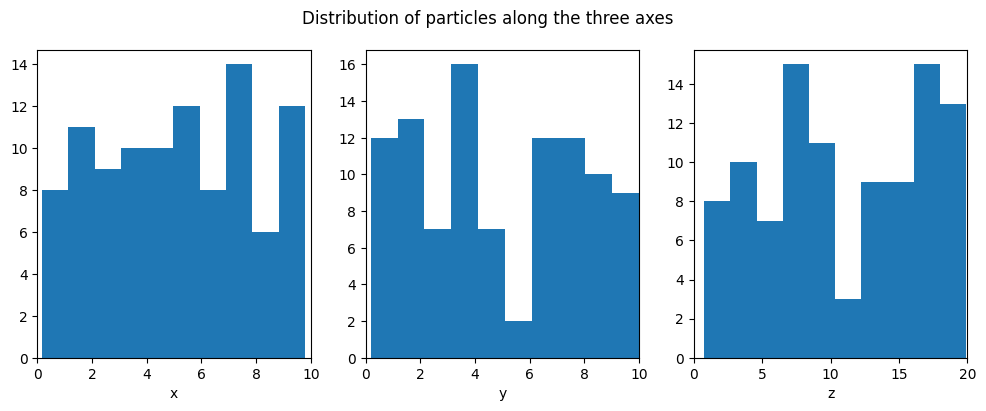

In [34]:
for i in range(10):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    for j in range(3):
        i_ax_vals = [pos[j] for pos in all_pos[i]]
        axes[j].hist(i_ax_vals)#, bins=50, density=True)
        axes[j].set_xlim([0, param[f"box_{'xyz'[j]}"]])
        print(f"Average distribution along axis {j}: {sum(i_ax_vals)/len(i_ax_vals)}")
    axes[0].set_xlabel('x')
    axes[1].set_xlabel('y')
    axes[2].set_xlabel('z')
    fig.suptitle("Distribution of particles along the three axes")
# plt.show()

## Acceptance ratio

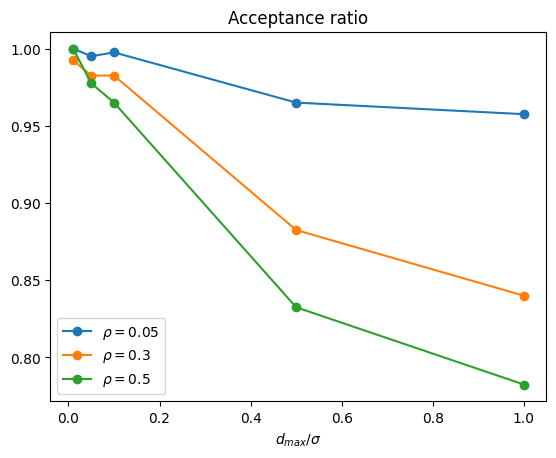

In [60]:
def calculate_acceptance_ratios():
    acceptance_ratios = {} #Fill with values
    for dens in densities:
        acceptance_ratios[str(dens)] = []
        for dx in dxs:
            _, temp_results, _ = read_values(dens, dx)
            temp_acceptance_ratio = np.mean([temp_results["accepted"][i]/temp_results["tries"][i] for i in range(len(temp_results))])
            acceptance_ratios[str(dens)].append(temp_acceptance_ratio)
    return acceptance_ratios

acceptance_ratios = calculate_acceptance_ratios()
for key, val in acceptance_ratios.items():
    plt.plot(dxs, val, "o-", label=r"$\rho=$" + key)
plt.xlabel(r"$d_{max}/\sigma$")
# plt.xticks([r"$\sigma$", 0])
plt.title("Acceptance ratio")
plt.legend()

The results are done over an average of 10 realizations per data point.

There is a trend that an increase in density leads to decrease in acceptance rate, which could be explained by the lack of space to move around in, increasing the probability for an overlap.

There is also a trend that an increase in $d_{max}$ leads to a decrease in acceptance ratio. This is probably due to the fact that if a sphere can only move $0.1*\sigma$ in each direction, it maximum needs some fraction of the sphere volume of free space to move. While for larger displacements, e.g. on the scale of $\sigma$, you could end up needing free space on the size of a sphere, to be allowed to do the move. This would also decrease the acceptance ratio when the volume decreases, since the probbability of finding free space decreases for the spheres.
